In [1]:
%matplotlib inline

import numpy as np
import glob
from pathlib import Path
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import community as community_louvain
from pyvis.network import Network

In [19]:
# Utilies (Save Graph as File)
def save_graph(graph, file_name):
    # initialze Figure
    nt = Network('800px', '1200px')
    # populates the nodes and edges data structures
    nt.from_nx(graph)
    nt.show(f'{file_name}.html')


def plot_graph(graph, title):
    partition = community_louvain.best_partition(graph)
    pos = nx.spring_layout(graph, k=10)  # For better example looking
    # nx.draw(graph, pos, with_labels=True)
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G,pos)
    plt.title(title)
    plt.show()


def print_graph_analytics(graph, title):
    print(f"{title} - nodes:                {nx.number_of_nodes(graph)}")
    print(f"{title} - edges:                {nx.number_of_edges(graph)}")
    print(f"{title} - density:              {nx.density(graph)}")
    print(f"{title} - avg-clustering:       {nx.algorithms.average_clustering(graph)}")
    print(f"{title} - wiener-index:         {nx.algorithms.wiener_index(graph)}")
    #print(f"{title} - small-world sigma:    {nx.sigma(graph)}")
    #print(f"{title} - small-world omega:    {nx.omega(graph)}")


def calculate_graph_measures(graph, relevant_nodes):

    # betweenness_centrality
    betweenness_centrality = nx.betweenness_centrality(graph)
    betweenness_centrality_filtered = dict(filter(lambda elem: elem[0] in relevant_nodes, betweenness_centrality.items()))

    # # closness_centrality
    closeness_centrality = nx.closeness_centrality(graph)
    closeness_centrality_filtered = dict(filter(lambda elem: elem[0] in relevant_nodes, closeness_centrality.items()))

    # # average_degree_connectivity
    avg_local_degree = nx.algorithms.assortativity.average_degree_connectivity(graph)
    avg_local_degree_filtered = dict(filter(lambda elem: elem[0] in relevant_nodes, avg_local_degree.items()))
    return {
        'nodes': nx.number_of_nodes(graph),
        'edges': nx.number_of_edges(graph),
        'density': nx.density(graph),
        'avg_clustering': nx.algorithms.average_clustering(graph),
        'wiener_index': nx.algorithms.wiener_index(graph),
        'betweenness_centrality': np.average(list(betweenness_centrality_filtered.values())),
        'closness_centrality': np.average(list(closeness_centrality_filtered.values())),
        'average_degree_connectivity': np.average(list(avg_local_degree_filtered.values())),
        'local_clustering_coefficent': nx.algorithms.approximation.average_clustering(graph)
    }

def normalize_values(x, y):
    normalized = np.e**-(x - y)**2
    # print(f'normalized value of {x} and {y}: {normalized}')
    return normalized

# The next step is to read all single gene-networks and plot them
> Note: Run this in the online jupyter notebook if its not working

## Alzheimer Disease

app_string_interactions - nodes:                11
app_string_interactions - edges:                36
app_string_interactions - density:              0.6545454545454545
app_string_interactions - avg-clustering:       0.7862914862914863
app_string_interactions - wiener-index:         74.0


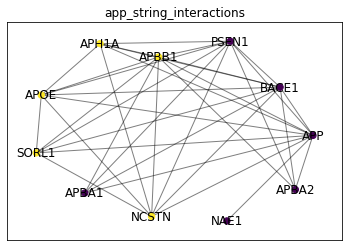

hfe_string_interactions - nodes:                11
hfe_string_interactions - edges:                40
hfe_string_interactions - density:              0.7272727272727273
hfe_string_interactions - avg-clustering:       0.8733766233766235
hfe_string_interactions - wiener-index:         70.0


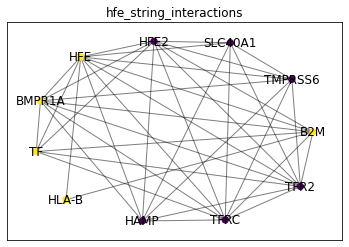

mpo_string_interactions - nodes:                11
mpo_string_interactions - edges:                22
mpo_string_interactions - density:              0.4
mpo_string_interactions - avg-clustering:       0.7242424242424242
mpo_string_interactions - wiener-index:         88.0


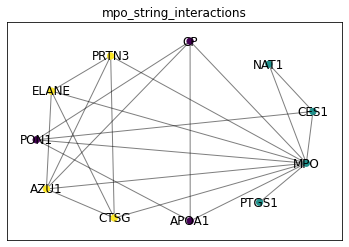

nos3_string_interactions - nodes:                11
nos3_string_interactions - edges:                38
nos3_string_interactions - density:              0.6909090909090909
nos3_string_interactions - avg-clustering:       0.8494227994227994
nos3_string_interactions - wiener-index:         72.0


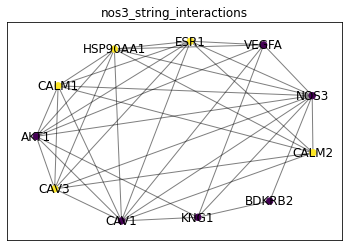

plau_string_interactions - nodes:                11
plau_string_interactions - edges:                45
plau_string_interactions - density:              0.8181818181818182
plau_string_interactions - avg-clustering:       0.8860028860028861
plau_string_interactions - wiener-index:         65.0


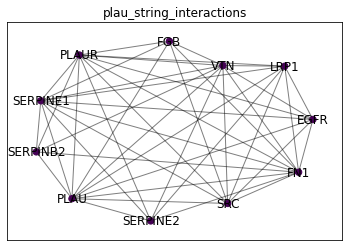

In [3]:
path = "data/ad/genes/*.csv"
for fname in glob.glob(path):
    df = pd.read_csv(fname)
    Graphtype = nx.Graph()
    file_name = Path(fname).stem
    G = nx.from_pandas_edgelist(df, source="Source", target="Target",
                                create_using=Graphtype)
    print_graph_analytics(G, file_name)
    plot_graph(G, file_name)

## Schizophrenia

apol2_string_interactions - nodes:                11
apol2_string_interactions - edges:                12
apol2_string_interactions - density:              0.21818181818181817
apol2_string_interactions - avg-clustering:       0.36767676767676766
apol2_string_interactions - wiener-index:         98.0


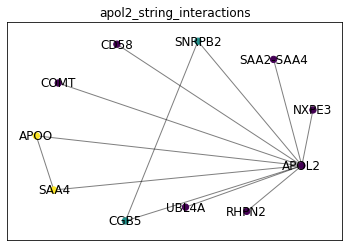

apol4_string_interactions - nodes:                11
apol4_string_interactions - edges:                15
apol4_string_interactions - density:              0.2727272727272727
apol4_string_interactions - avg-clustering:       0.5252525252525252
apol4_string_interactions - wiener-index:         95.0


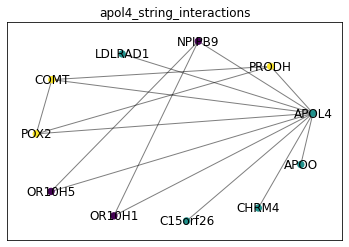

chi3l1_string_interactions - nodes:                11
chi3l1_string_interactions - edges:                24
chi3l1_string_interactions - density:              0.43636363636363634
chi3l1_string_interactions - avg-clustering:       0.6529581529581528
chi3l1_string_interactions - wiener-index:         86.0


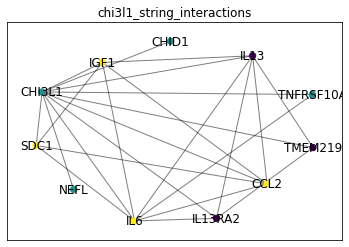

comt_string_interactions - nodes:                11
comt_string_interactions - edges:                33
comt_string_interactions - density:              0.6
comt_string_interactions - avg-clustering:       0.8261183261183263
comt_string_interactions - wiener-index:         77.0


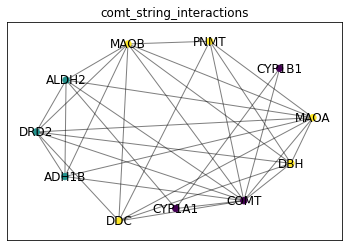

daoa_string_interactions - nodes:                11
daoa_string_interactions - edges:                41
daoa_string_interactions - density:              0.7454545454545455
daoa_string_interactions - avg-clustering:       0.842929292929293
daoa_string_interactions - wiener-index:         69.0


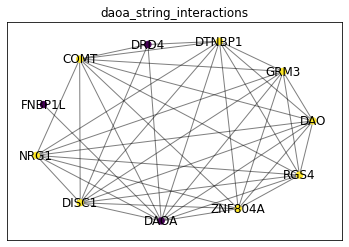

disc1_string_interactions - nodes:                11
disc1_string_interactions - edges:                33
disc1_string_interactions - density:              0.6
disc1_string_interactions - avg-clustering:       0.831024531024531
disc1_string_interactions - wiener-index:         77.0


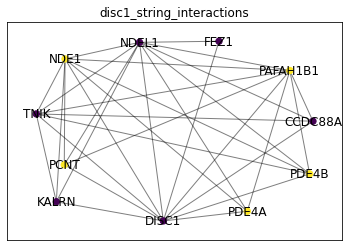

drd3_string_interactions - nodes:                11
drd3_string_interactions - edges:                36
drd3_string_interactions - density:              0.6545454545454545
drd3_string_interactions - avg-clustering:       0.8556998556998555
drd3_string_interactions - wiener-index:         74.0


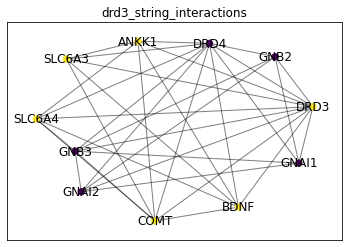

htr2a_string_interactions - nodes:                11
htr2a_string_interactions - edges:                34
htr2a_string_interactions - density:              0.6181818181818182
htr2a_string_interactions - avg-clustering:       0.8241702741702742
htr2a_string_interactions - wiener-index:         76.0


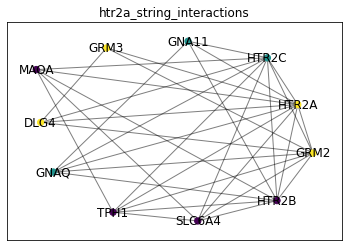

mthfr_string_interactions - nodes:                11
mthfr_string_interactions - edges:                52
mthfr_string_interactions - density:              0.9454545454545454
mthfr_string_interactions - avg-clustering:       0.9525252525252526
mthfr_string_interactions - wiener-index:         58.0


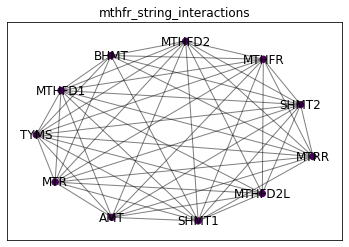

rtn4r_string_interactions - nodes:                11
rtn4r_string_interactions - edges:                41
rtn4r_string_interactions - density:              0.7454545454545455
rtn4r_string_interactions - avg-clustering:       0.8751082251082252
rtn4r_string_interactions - wiener-index:         69.0


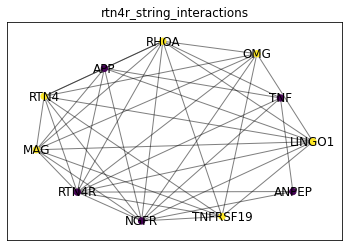

syn2_string_interactions - nodes:                11
syn2_string_interactions - edges:                55
syn2_string_interactions - density:              1.0
syn2_string_interactions - avg-clustering:       1.0
syn2_string_interactions - wiener-index:         55.0


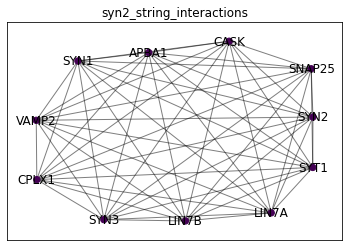

In [4]:
path = "data/schiz/genes/*.csv"
for fname in glob.glob(path):
    df = pd.read_csv(fname)
    Graphtype = nx.Graph()
    file_name = Path(fname).stem
    G = nx.from_pandas_edgelist(df, source="Source", target="Target",
                                create_using=Graphtype)
    print_graph_analytics(G, file_name)
    plot_graph(G, file_name)

# Read CSV Files (AD Network Full and Schizophrenia Network Full)

In [5]:
df_ad = pd.read_csv('data/ad/ad_network_full_with_labels.csv', sep=",")
df_schiz = pd.read_csv('data/schiz/schiz_network_full_with_labels.csv', sep=",")

# Create networkX Graph from Pandas Edgelist (AD Network)
> Note: This will take some time

In [20]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df_ad, source="Source", target="Target",
                            create_using=Graphtype, edge_attr=True)
# save_graph(G, file_name="ad_network_graph")
# print_graph_analytics(G, "ad_network_graph")
# plot_graph(G, "alzheimer disease")
relevant_genes = ["APP","HFE","MPO","NOS3","PLAU"]
measures_AD = calculate_graph_measures(G, relevant_genes)
print('measures for alzheimer disease calculated')

measures for alzheimer disease calculated


D:\Dev\ffhs\na-python\venv\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
D:\Dev\ffhs\na-python\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Create networkX Graph from Pandas Edgelist (Schizophrenia Network)
> Note: This will take some time

In [ ]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df_schiz, source="Source", target="Target",
                            create_using=Graphtype, edge_attr=True)
# save_graph(G, file_name="schiz_network_graph")
# print_graph_analytics(G, "schiz_network_graph")
# plot_graph(G, "schizophrenia network full")
relevant_genes = ["APOL2","APOL4","CHI3L1","COMT","DAOA","DISC1","DRD3","HTR2A","MTHFR","RTN4R","SYN2"]
measures_schiz = calculate_graph_measures(G, relevant_genes)
print('measures for schizophrenia disease calculated')


# Comparing and normalizing measures of AD and Schizophrenia Networks

In [18]:
print(measures_AD)
print(measures_schiz)

for i in range(len(measures_AD)):

    normalized = normalize_values(list(measures_AD.values())[i], list(measures_schiz.values())[i])
    print(f'Comparing measure "{list(measures_AD.keys())[i]}": {list(measures_AD.values())[i]} to \
    {list(measures_schiz.values())[i]} -> normalized: {normalized}')

{'nodes': 6089, 'edges': 11310, 'density': 0.0006101996901415685, 'avg_clustering': 0.4028058457924002, 'betweenness_centrality': 0.46147779197112815}
{'nodes': 7779, 'edges': 16212, 'density': 0.0005358890467709958, 'avg_clustering': 0.3837123705628701, 'wiener_index': 88595362.0, 'betweenness_centrality': {'M6PR': 0.0, 'COMT': 0.14032976935617955, 'CYP26B1': 2.2121073556434236e-05, 'CHI3L1': 0.09691237263859603, 'SEMA3F': 0.0, 'NRXN1': 0.1928471289797182, 'NRG1': 0.1076236128398901, 'RTN4R': 0.10144273738933623, 'CFTR': 0.0, 'MTHFR': 0.18447391597245957, 'PSEN1': 0.18578072993874425, 'USP28': 0.00016288989175273493, 'RBM12': 0.10609071912841421, 'DRD3': 0.04071806927877363, 'SLC7A2': 0.0, 'SLC1A1': 0.07835218480237836, 'PRODH': 0.08047727365674542, 'PDK4': 0.0, 'CACNG3': 0.0, 'SYN2': 0.13580839527738567, 'HTR2A': 0.0570480183877248, 'TMEM132A': 0.0, 'DVL2': 0.0, 'RPAP3': 0.0, 'CX3CL1': 1.3264461861335808e-05, 'TRAPPC6A': 0.0, 'YBX2': 0.0, 'ITGA3': 0.0, 'CRY1': 0.0, 'PGLYRP1': 0.0, 'S

# Now we read the whole Homo-Sapiens Gene Network

In [9]:
df_all = pd.read_csv('data/all_protein_combined.csv', sep="\s+")

In [ ]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df_all, source="Source", target="Target",
                            create_using=Graphtype, edge_attr=True)

closeness = nx.closeness_centrality(G)
clustering = nx.average_clustering(G)
print(f"closeness {closeness}")
print(f"clustering {clustering}")
APP = G.nodes["9606.ENSP00000284981"]
print(APP)

# save_graph(G, file_name="ad_network_graph")
# print_graph_analytics(G, "full_homo_sapiens_network")